# Task-1

Importing the necessary libraries for all the lab tasks

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


#Task - 1(i)

Defining the Log Transformation function and using subplots to find the effect of the transformation function on images

In [55]:
#The Log Transformation Function
def log_transform (img):
  img_array = np.array(img)
  c = 255 / np.log( 1 + np.max(img_array))
  log_image = c * (np.log(img_array + 1))
  log_image = np.array(log_image, dtype = np.uint16)
  return log_image

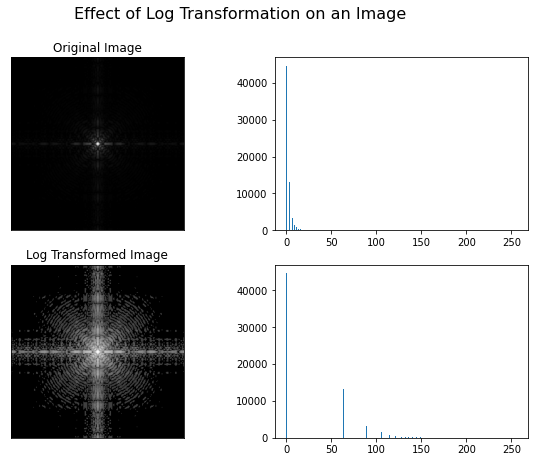

In [54]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
img = Image.open('/content/Fig0305(a)(DFT_no_log).tif')
log_image = log_transform(img)
ax[0][0].imshow(img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')
ax[0][1].hist(np.array(img).ravel(),256,[0,256]); 
ax[1][0].imshow(log_image, cmap = 'gray')
ax[1][0].title.set_text('Log Transformed Image')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][1].hist(log_image.ravel(),256,[0,256]);
fig.suptitle('Effect of Log Transformation on an Image', fontsize=16)
plt.show() 

# Task - 1 (ii)

Defining the Power Law Transformation function and using subplots to find the effect of varying gamma value on images

In [64]:
def power_transform(img, gamma):
  return np.array(255*(np.array(img) / 255) ** gamma, dtype = int)

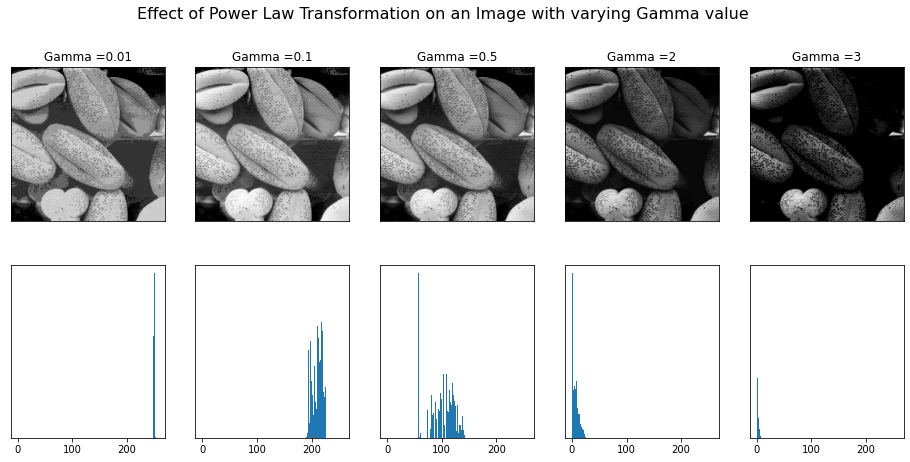

In [65]:
fig, ax = plt.subplots(2,5, figsize=(16,7))
img = Image.open('/content/Fig0320(4)(bottom_left).tif')
index = 0
for gamma in [0.01, 0.1, 0.5, 2, 3]:
    gamma_corrected = power_transform(img, gamma)
    ax[0][index].imshow(gamma_corrected, cmap = 'gray')
    label = 'Gamma =' + str(gamma)
    ax[0][index].title.set_text(label)
    ax[0][index].xaxis.set_ticks([])
    ax[0][index].yaxis.set_ticks([])
    ax[1][index].hist(gamma_corrected.ravel(),256,[0,256]); 
    #ax[1][index].xaxis.set_ticks([])
    ax[1][index].yaxis.set_ticks([])
    index = index + 1
    #ax[0].plot(im)
fig.suptitle('Effect of Power Law Transformation on an Image with varying Gamma value', fontsize=16)
plt.show()

## Question-1: Which function is suitable for which type of Image?
**Ans:** The Log transformation function is suitable for relatively darker images or images with a higher distribution of lower intensity values. The image in the graph is a relatively darker image and applying log transformation reveals structural details that were unseen previously. 

On the other hand, the Power Law Transformation function is more flexible as the parameter gamma can be manually tuned. Hence, it can be applied for both darker and lighter images. For darker images, the value of gamma has to be greater than zero but less than one, in order to brighten the image. For the brighter images, the value of gamma has to be greater than 1, in order to darken the image. The effect of value of gamma can be seen in the graph, and a value can be picked accordingly. I prefer `gamma = 0.5` for the given image.

## Question-2: Why is intensity scaling required before displaying?

**Ans:** After applying any form of transformation without scaling, the pixel intensity can take any value; it won't be within the range [0-255]. For instance, if we perform log transformation then the maximum intensity value will be log(255) which approximates to 5.54. Again, for power functions with power greater than 1 or antilog functions, the intensity values will go beyond 255. During image display, the display function expects the intensity values to be in the range [0-255]. Hence, we need to scale the values to the appropriate range after any transformation before displaying the image.

### Task - 2

We implement global histogram equalization using the CDF

In [66]:
def hist_equalize(img):
  img_array = np.array(img)
  hist,bins = np.histogram(img_array.flatten(),256,[0,256])
  cdf = hist.cumsum()
  cdf_normalized = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
  return cdf_normalized[img_array]

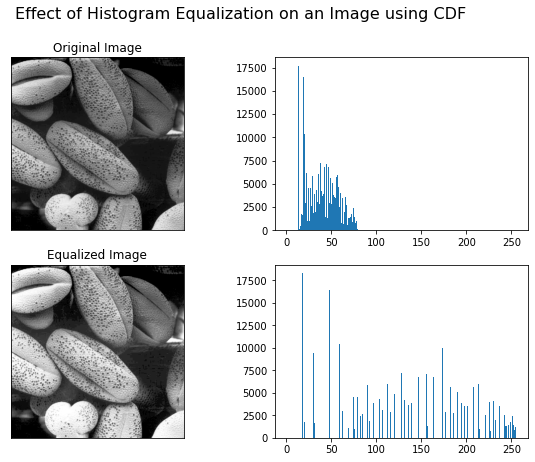

In [67]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
img_equalized = hist_equalize(img)
ax[0][0].imshow(img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')
ax[0][1].hist(np.array(img).ravel(),256,[0,256]); 
ax[1][0].imshow(img_equalized, cmap = 'gray')
ax[1][0].title.set_text('Equalized Image')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][1].hist(img_equalized.ravel(),256,[0,256]);
fig.suptitle('Effect of Histogram Equalization on an Image using CDF', fontsize=16)
plt.show() 

## Question-3: Why repeated application of HE doesn't produce any further improvements on output images?

**Ans:** Applying historgram equalization once, equalizes the histogram of the image i.e. the intesity values are more or less equally distributed in the given range. Afterwards, any form of equalization will be redundant as you can not equalize an already equalized system. For example -  if you have 3 unequal values and you equalize them once, all 3 values will be equal. Any further form of equalization will have no effect. Hence, repeated application of HE doesn't produce any effect.

# Task-3


We implement local histogram equalization by slicing the image into equal patches (the remaining pixels are taken in the last patches). Then for each patch we perform histogram equalization and update the changes to the image. A patch size of 100x100 is taken for this case.

In [68]:
def local_equalize(img, patch_x = 100, patch_y = 100):

  local_img = np.array(img)
  m = local_img.shape[0]
  n = local_img.shape[1]

  s_x = 0  # x-value of the starting pixel of the cropped image
  s_y = 0  # y-value of the starting pixel of the cropped image
  f_x = s_x + patch_x # x-value of the ending pixel of the cropped image
  f_y = s_y + patch_y # y-value of the ending pixel of the cropped image

  while(1): #Looping over row-wise
    s_x = 0
    f_x = s_x + patch_x
    while(1): #Looping over column-wise
      img_crop = local_img[s_x:f_x, s_y: f_y] #Taking a local image crop
      crop_eq = hist_equalize(img_crop)
      local_img[s_x:f_x, s_y: f_y] = crop_eq  #Applying the equalized image crop value to the output image
      s_x += patch_x                #Incrementing x-axis values of start and end pixel
      f_x = s_x + patch_x
      if f_x>=m:            #Checking the condition if the finishing x-axis pixel value is out of bound
        img_crop = local_img[s_x:, s_y: ] #Applying equalization on the remaining pixels of the particular column by performing an extra step
        crop_eq = hist_equalize(img_crop)
        local_img[s_x:, s_y: ] = crop_eq
        break;
    s_y += patch_y               #Incrementing y-axis values of start and end pixel
    f_y = s_y + patch_y
    if f_y>=n:  #Checking the condition if the finishing y-axis pixel value is out of bound
      s_x = 0
      f_x = s_x + patch_x
      while(1): #Applying equalization on the remaining pixels of the rows by looping over all the rows and performing equalization
        img_crop = local_img[s_x:f_x, s_y: ]
        crop_eq = hist_equalize(img_crop)
        local_img[s_x:f_x, s_y: ] = crop_eq
        s_x += patch_x
        f_x = s_x + patch_x
        if f_x>=m:
          img_crop = local_img[s_x:, s_y: ]
          crop_eq = hist_equalize(img_crop)
          local_img[s_x:, s_y: ] = crop_eq
          break;
      break;
  return local_img

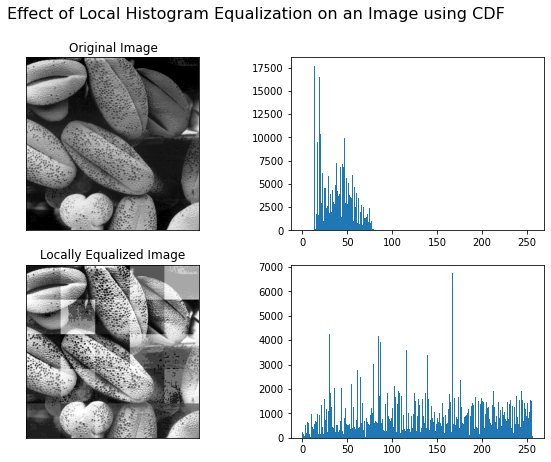

In [69]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
local_img = local_equalize(img)
ax[0][0].imshow(img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')
ax[0][1].hist(np.array(img).ravel(),256,[0,256]); 
ax[1][0].imshow(local_img, cmap = 'gray')
ax[1][0].title.set_text('Locally Equalized Image')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][1].hist(local_img.ravel(),256,[0,256]);
fig.suptitle('Effect of Local Histogram Equalization on an Image using CDF', fontsize=16)
plt.show() 

##Question-4: Why do you have annoying side effects at the boundary of local image regions?

**Ans:** For local equalization, the distribution of the local regions are equalized. Different local regions have different distributions. Hence, the effect of histrogram equalization on different local regions will be different. At the boundaries of the local region, the contrasting effect due to different distributions is visible and that's why, we have this annoying side effect at the boundary.